In [ ]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')
data = df[['Open', 'High', 'Low', 'Close']].values

In [ ]:
window = 20
target_col = 3
train_size = int(len(data) * 0.8)

train_raw = data[:train_size]
test_raw  = data[train_size - window:]

In [ ]:
# 2. 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

train_X_scaled = scaler_X.fit_transform(train_raw)
train_y_scaled = scaler_y.fit_transform(train_raw[:, [target_col]])

test_X_scaled  = scaler_X.transform(test_raw)
test_y_scaled  = scaler_y.transform(test_raw[:, [target_col]])

In [ ]:
def make_xy_multivar(X_scaled, y_scaled, window):
    Xs, ys = [], []
    for i in range(len(X_scaled) - window):
        Xs.append(X_scaled[i:i+window, :])
        ys.append(y_scaled[i+window, 0])
    return np.array(Xs), np.array(ys)[:, None]

x_train, y_train = make_xy_multivar(train_X_scaled, train_y_scaled, window)
x_test,  y_test  = make_xy_multivar(test_X_scaled,  test_y_scaled,  window)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,4)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=8,
    shuffle=False,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0059
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0030
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0011
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 6.9833e-04
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.6305e-04
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.4091e-04
Epoch 7/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.9747e-04
Epoch 8/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.8914e-04
Epoch 9/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.7903e-04
Epoch 10/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.8292e-04
Epoch 11/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.8742e-04
Epoch 12/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 3.9274e-04
Epoch 13/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.6255e-04
Epoch 14/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.9263e-04
Epoch 15/50
293/293 

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test MSE: 58.9442


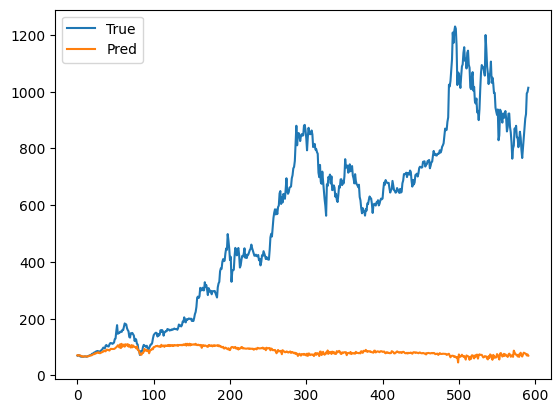

In [ ]:
# 5. 예측
pred_train = model.predict(x_train)
pred_test  = model.predict(x_test)
plt.plot(scaler_y.inverse_transform(y_test), label='True')
plt.plot(scaler_y.inverse_transform(pred_test), label='Pred')

mse = mean_squared_error(y_test, pred_test)
print(f"Test MSE: {mse:.4f}")
plt.legend(); plt.show()